<ipython-input-49-c75a6fd69df1>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_by_country['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for
<ipython-input-49-c75a6fd69df1>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_by_country['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for
<ipython-input-49-c75a6fd69df1>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

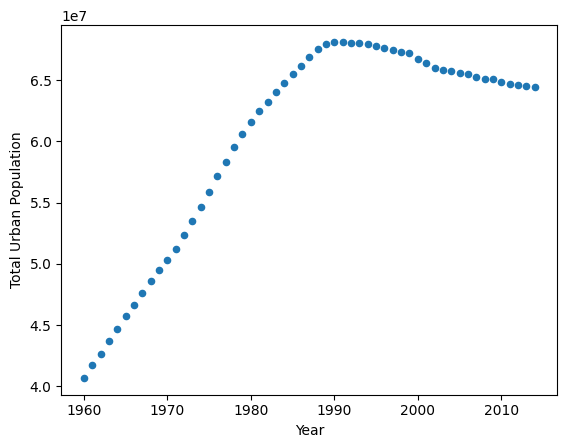

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

list = __builtins__.list

def plot_pop(filename, country_code, c_size = 1000):
  """Take the input csv, read it into a dataframe by chunksize c_size,
     filters by country_code, then plots the total urban population as
     a function of time"""

  df_input = pd.read_csv(filename, chunksize = c_size)
  data = pd.DataFrame()

  for df_urb_pop in df_input:
    df_by_country = df_urb_pop[df_urb_pop['CountryCode'] == country_code]

    pops = zip(df_by_country['Total Population'],
               df_by_country['Urban population (% of total)'])

    pops_list = list(pops)

    df_by_country['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for
                                               tup in pops_list]

    data = pd.concat([data, df_by_country])

  data.plot(kind='scatter', x='Year', y='Total Urban Population')
  plt.show()

plot_pop('sample_data/world_ind_pop_data.csv', 'CEB')




Recap of previous chapters:

In [43]:
list1 = [1,2,3,4]
list2 = [5,6,7,8]

def zip_lists(list1: list, list2: list) -> list:
  """This function zips the input lists and returns a list of the zipped list
     elements"""
  z = zip(list1, list2)
  z_list = list(z)
  print(type(z))

  return(z_list)

print(zip_lists(list1, list2))

comp_z = [(num1, num2) for num1 in list1 if num1<5 for num2 in list2 if num2>4]
print(comp_z)

#df = pd.read_csv('sample.csv', chunksize = 10)


<class 'zip'>
[(1, 5), (2, 6), (3, 7), (4, 8)]
[(1, 5), (1, 6), (1, 7), (1, 8), (2, 5), (2, 6), (2, 7), (2, 8), (3, 5), (3, 6), (3, 7), (3, 8), (4, 5), (4, 6), (4, 7), (4, 8)]


In [44]:
def num_sequence(n: int) :
  """Generate values from 0 to n"""

  while i < n:
    yield i
    i += 1

def read_large_file(file_object):
  """Generator function to read large data files"""

  while True:

    data = file_object.readline()

    if not data:
      break

    yield data

with open('sample_data/world_ind_pop_data.csv') as file:
  gen_file = (read_large_file(file))

  print(next(gen_file))
  print(next(gen_file))
  print(next(gen_file))

CountryName,CountryCode,Year,Total Population,Urban population (% of total)

Arab World,ARB,1960,92495902.0,31.285384211605397

Caribbean small states,CSS,1960,4190810.0,31.5974898513652



###Pandas read_csv() for streaming data

In [45]:
import pandas as pd

df_reader = pd.read_csv('sample_data/world_ind_pop_data.csv', chunksize = 100)

df_urb_pop = next(df_reader)
#print(next(df_reader))

df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']
print(df_pop_ceb)

                      CountryName CountryCode  Year  Total Population  \
2  Central Europe and the Baltics         CEB  1960        91401583.0   

   Urban population (% of total)  
2                      44.507921  


In [46]:
list1 = [(1,2),(3,4),(4,5)]

#comp_test = [num1*num2*0.01 for num1, num2 in list1]
comp_test = [tup[0] * tup[1] *0.01 for tup in list1]
print(comp_test)
print(list[0])

[0.02, 0.12, 0.2]
list[0]
